In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = "/content/drive/MyDrive/final/data/"
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지

# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

matplotlib.rc('font', family='NanumBarunGothic') # 폰트 적용

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
reset_seeds(SEED)

In [ ]:
df = pd.read_csv(f"{DATA_PATH}아모레크롤링_스킨케어 (1).csv")
df

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...
...,...,...,...,...,...,...,...,...,...,...,...
112763,스킨케어,프리메라,모이스처 클렌징 티슈 300g,drea****,5,2020.01.11,40대,여성,복합성,모공,자극적이지 않고 순하게 화장을 지워주어 좋아요.
112764,스킨케어,프리메라,모이스처 클렌징 티슈 300g,kim4***,5,2022.05.11,50대 이상,여성,복합성,칙칙함,순하고 화장도 잘지워지고 기름지지않아서 좋아요 ~~^^
112765,스킨케어,프리메라,모이스처 클렌징 티슈 300g,hyej*****,4,2022.04.12,40대,여성,수분부족지성,탄력없음,클렌징티슈는 이것만 사용해요 자극 덜하고 향도 좋아요~
112766,스킨케어,프리메라,모이스처 클렌징 티슈 300g,sooh*****,4,2019.08.31,40대,여성,수분부족지성,모공,제 인생템 중 하나입니다 없으면 불안해져 쟁여놓고 쓴답니다~


# 기술통계

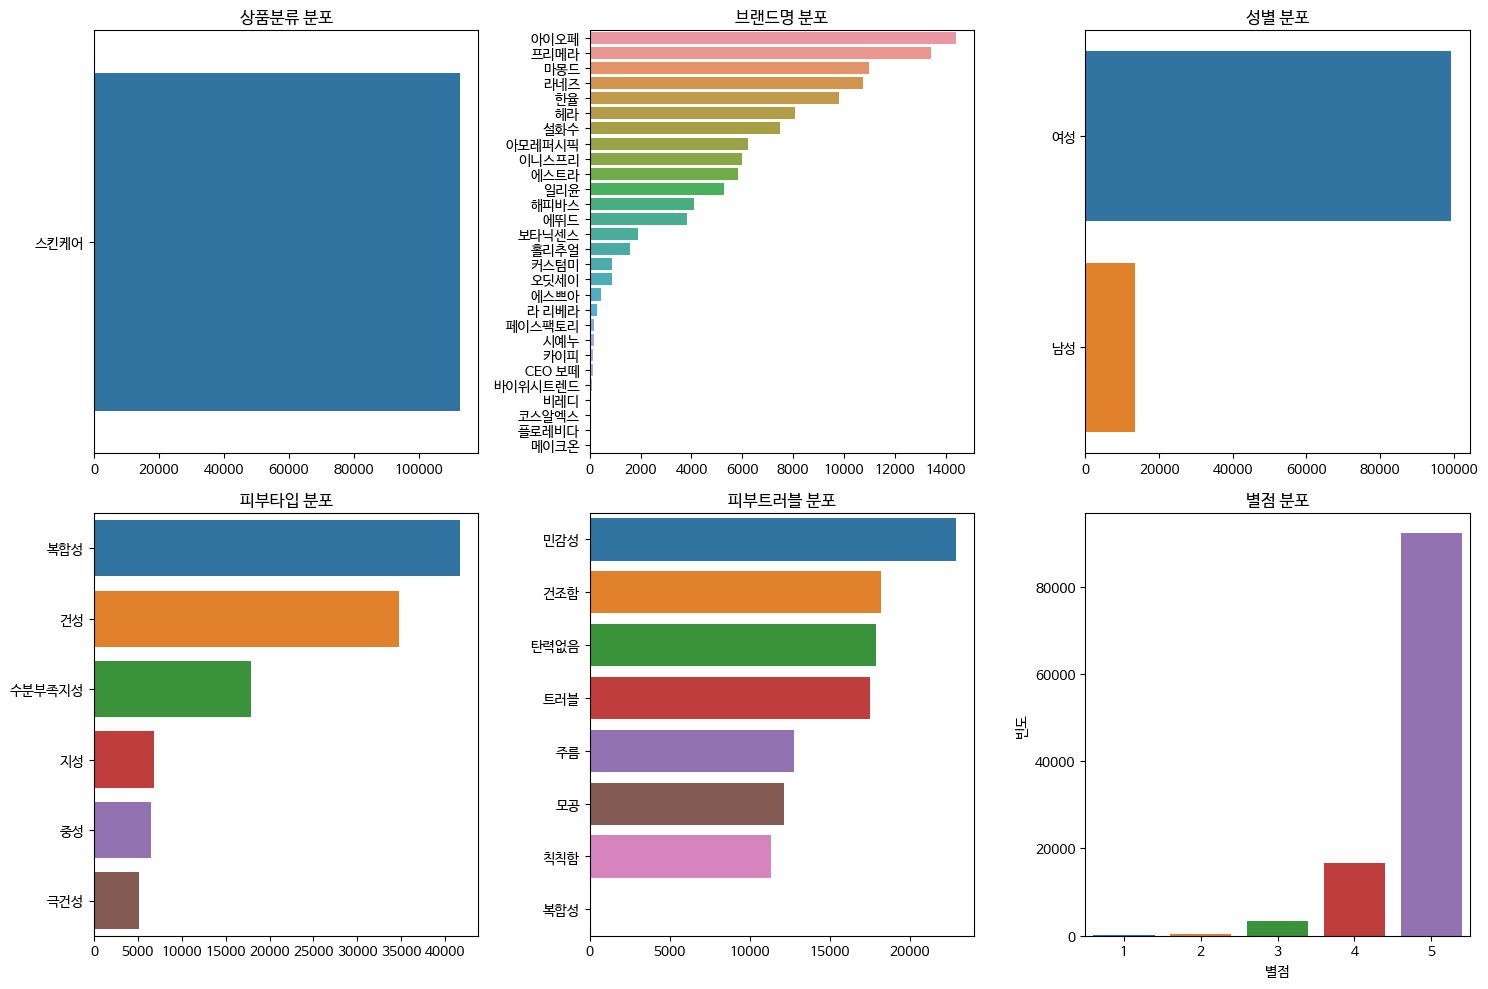

In [ ]:
# 설정
plt.figure(figsize=(15, 10))

# 범주형 특성의 분포
categorical_features = ['상품분류', '브랜드명', '성별', '피부타입', '피부트러블']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'{feature} 분포')
    plt.xlabel('')
    plt.ylabel('')

# 별점 분포
plt.subplot(2, 3, 6)
sns.countplot(x='별점', data=df)
plt.title('별점 분포')
plt.xlabel('별점')
plt.ylabel('빈도')

plt.tight_layout()
plt.show()


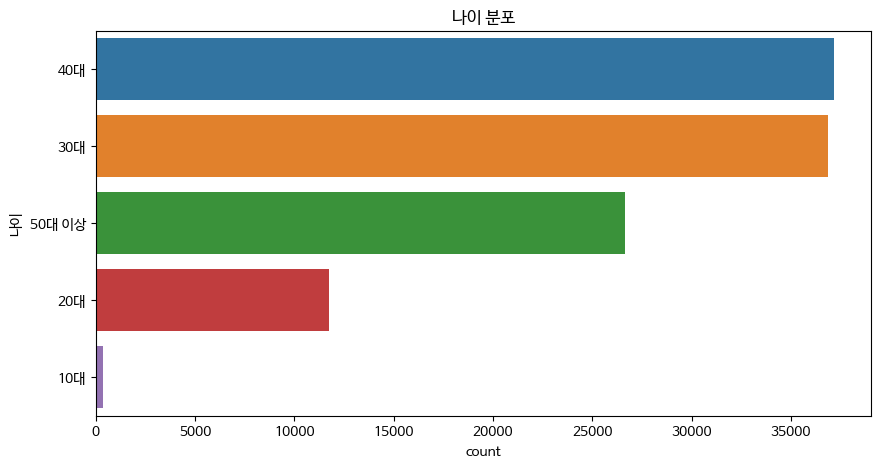

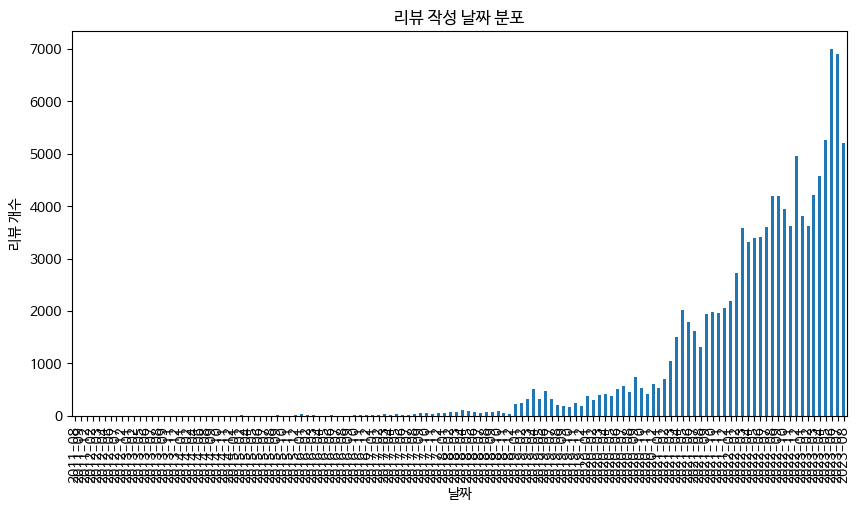

In [ ]:
# 나이 분포
plt.figure(figsize=(10, 5))
sns.countplot(y='나이', data=df, order=df['나이'].value_counts().index)
plt.title('나이 분포')
plt.show()

# 리뷰 작성 날짜 분포
df['리뷰작성날짜'] = pd.to_datetime(df['리뷰작성날짜'])
date_distribution = df['리뷰작성날짜'].dt.to_period("M").value_counts().sort_index()

plt.figure(figsize=(10, 5))
date_distribution.plot(kind='bar')
plt.title('리뷰 작성 날짜 분포')
plt.xlabel('날짜')
plt.ylabel('리뷰 개수')
plt.show()


In [ ]:
pd.crosstab(df["성별"],df["피부타입"])

피부타입,건성,극건성,복합성,수분부족지성,중성,지성
성별,,,,,,
남성,4054,487,4834,1709,659,1694
여성,30702,4682,36864,16132,5792,5159


<Axes: xlabel='성별', ylabel='count'>

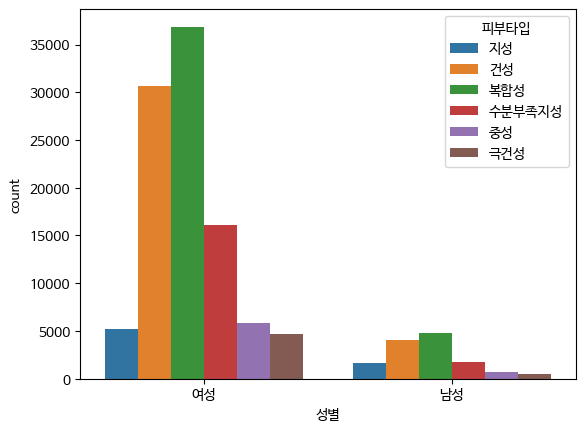

In [ ]:
sns.countplot(data=df, x="성별", hue="피부타입")

In [ ]:
pd.crosstab(df["나이"],df["피부타입"])

피부타입,건성,극건성,복합성,수분부족지성,중성,지성
나이,,,,,,
10대,59,14,128,76,16,58
20대,2867,446,3686,2913,673,1165
30대,9570,1734,13627,7434,1820,2661
40대,12018,1782,14560,5073,1875,1848
50대 이상,10242,1193,9697,2345,2067,1121


<Axes: xlabel='나이', ylabel='count'>

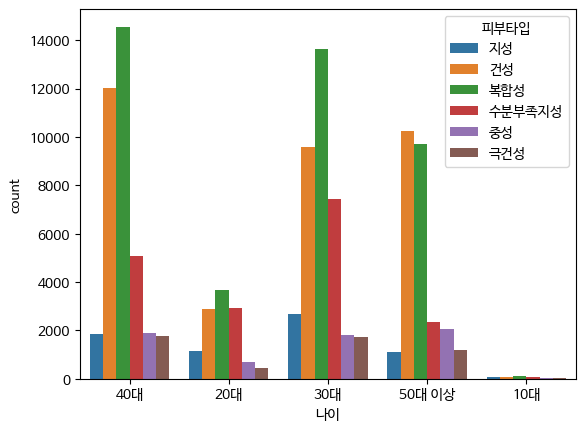

In [ ]:
sns.countplot(data=df, x="나이", hue="피부타입")

In [ ]:
pd.crosstab(df["성별"],df["브랜드명"])

브랜드명,CEO 보떼,라 리베라,라네즈,마몽드,메이크온,바이위시트렌드,보타닉센스,비레디,설화수,시예누,...,카이피,커스텀미,코스알엑스,페이스팩토리,프리메라,플로레비다,한율,해피바스,헤라,홀리추얼
성별,,,,,,,,,,,,,,,,,,,,,
남성,15,32,1167,1351,0,10,194,4,908,13,...,22,117,2,15,1371,1,1021,689,955,212
여성,109,247,9559,9642,11,75,1695,24,6588,166,...,103,771,24,174,12031,11,8797,3416,7120,1354


<Axes: xlabel='성별', ylabel='count'>

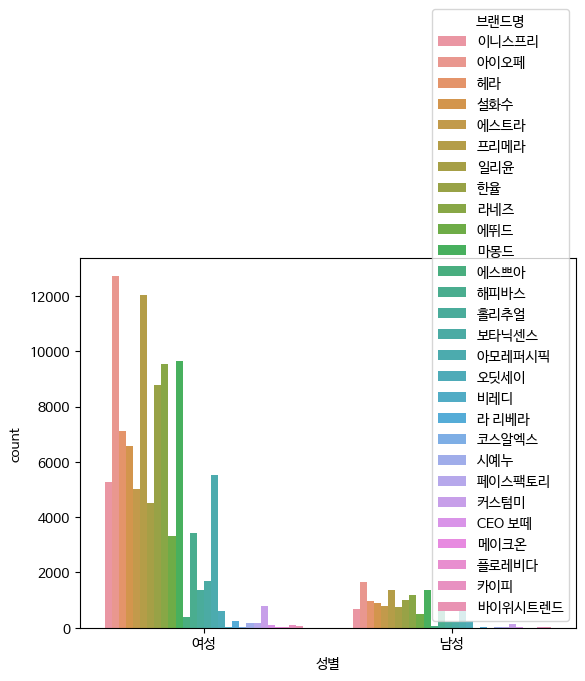

In [ ]:
sns.countplot(data=df, x="성별", hue="브랜드명")

In [ ]:
pd.crosstab(df["나이"],df["브랜드명"])

브랜드명,CEO 보떼,라 리베라,라네즈,마몽드,메이크온,바이위시트렌드,보타닉센스,비레디,설화수,시예누,...,카이피,커스텀미,코스알엑스,페이스팩토리,프리메라,플로레비다,한율,해피바스,헤라,홀리추얼
나이,,,,,,,,,,,,,,,,,,,,,
10대,0,0,39,59,0,1,4,0,12,0,...,0,14,0,0,50,0,44,18,24,1
20대,12,36,1237,1598,0,11,189,4,481,15,...,15,85,2,14,1262,2,1029,492,719,198
30대,26,115,3741,3795,5,35,534,8,1937,52,...,39,245,2,59,4074,2,3015,1601,2601,547
40대,46,79,3456,3141,3,28,652,8,2457,61,...,41,297,9,76,4792,5,3372,1187,2865,496
50대 이상,40,49,2253,2400,3,10,510,8,2609,51,...,30,247,13,40,3224,3,2358,807,1866,324


<Axes: xlabel='나이', ylabel='count'>

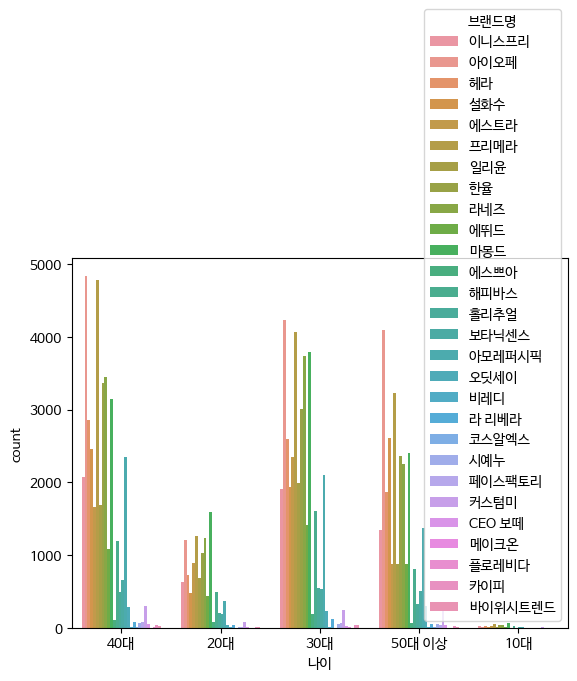

In [ ]:
sns.countplot(data=df, x="나이", hue="브랜드명")

In [ ]:
pd.crosstab(df["성별"],df["피부트러블"])

피부트러블,건조함,모공,민감성,복합성,주름,칙칙함,탄력없음,트러블
성별,,,,,,,,
남성,2173,1346,2945,0,1630,1010,1939,2394
여성,16058,10808,19941,1,11162,10304,15948,15109


<Axes: xlabel='성별', ylabel='count'>

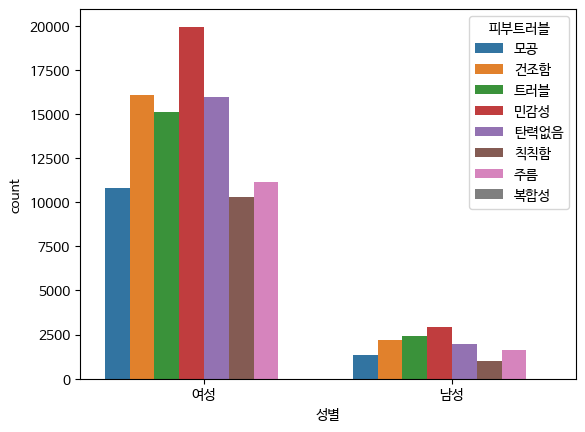

In [ ]:
sns.countplot(data=df, x="성별", hue="피부트러블")

In [ ]:
pd.crosstab(df["나이"],df["피부트러블"])

피부트러블,건조함,모공,민감성,복합성,주름,칙칙함,탄력없음,트러블
나이,,,,,,,,
10대,24,23,138,0,20,10,18,118
20대,1667,1572,3261,0,459,710,686,3395
30대,6045,4983,9000,0,2836,2976,3621,7385
40대,5927,3807,6474,0,4950,4537,7125,4336
50대 이상,4568,1769,4013,1,4527,3081,6437,2269


<Axes: xlabel='나이', ylabel='count'>

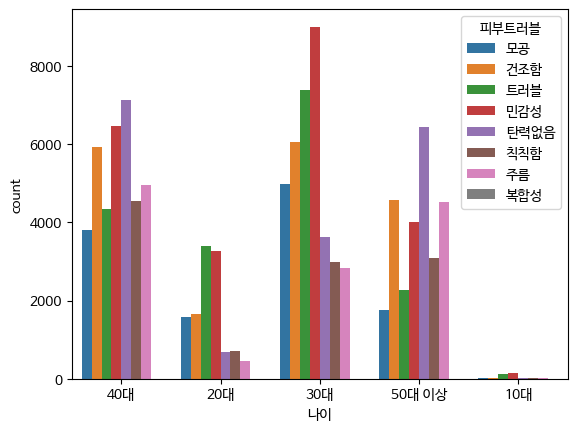

In [ ]:
sns.countplot(data=df, x="나이", hue="피부트러블")

# 텍스트분석

In [ ]:
!pip install kiwipiepy

In [ ]:
import re
train_review = []
for review in df['리뷰']:
    pat = re.compile("[^a-zA-Z가-힣ㄱ-ㅎ0-9]")
    result = pat.sub(" ",review)
    result = re.sub(" +", " ", result)
    train_review.append(result)

train_review

['남편이 극지성이에요 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라길래 각지제거 성분도 있다길래 바꿔봤어요 오늘 받자마자 사용해보라고 했는데 전 제품이랑 향이랑 사용감 모두 비슷해서 차이를 모르겠데요 조금 더 사용해 보고 한 달 후기 남길게요 수퍼화산송이도 엄청 만족하면서 사용했던 제품이라 이것도 만족스럽긴 하답니다 ',
 '여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 세안 해주면 좋은점이 뾰루지가 안나고 뽀드득하게 씻겨줘서 좋아요 세안 브러쉬에 적당하게 손마디 하나로 짜준다음 물을 묻히고 피부결 따라 거품으로 구석구석 닦아주면 좋답니다 ',
 '이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써서 세안하는데 세안후에도 당기는느낌이 많이 없어서 만족스럽네요 용량도 적당하고 패키지도 깔끔해서 욕실에두기도 좋아요 재구매의사 있습니다 ',
 '저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1 1 이벤트하길래 4개 쟁였어요 조금만 써도 거품도 잘나고 씻고 나서 남는 느낌도 없으면서 많이 건조하지도 않아서 좋아요 전에 쓰던거랑 케이스가 달라졌던데 내용물은 똑같았으면 좋겠네요 ',
 '여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 더 좋아요 피부 트러블도 일어나지 않아서 더 맘에 들어요 피부가 완전 촉촉해서 맘에 들어요 가족 모두 사용할수 있어요 각질제거 효과도 있어서 참 좋으네요 이번에 세일해서 여러개 구매했어요 ',
 '이니스프리 화산송이 모공 바하 클렌징폼을 구입해봤어요 이니스프리 화산송이 제품이 유명해서 클렌징폼 말고 다른 팩을 사용해봤었는데 꽤 만족해서 이번에는 요제품을 구입해봤는데 피부에 자극이 없는건 아니지만 격일로 쓰기에 좋은거같아요 겨울보다는 여름에 유용할 것 같습니다',
 '기한25년까지라 유효기간 넉넉하고 제품용량은 150g이에요 보통대용량을 사는데 클렌징폼은 한번쓸때 소량만 쓰기때문에 딱좋다고생각해요 거품도 잘 나구요 

In [ ]:
import kiwipiepy
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
stopwords =  Stopwords()
kiwi = Kiwi()

In [ ]:
stopwords.add(('좋', 'VA'))

In [ ]:
stopwords.add(('있', 'VA'))

In [ ]:
train_text = [str(item) for item in train_review]

In [ ]:
train_kiwi_va_words =[]

for idx,text in enumerate(train_text):
    result = kiwi.tokenize(text,stopwords=stopwords)
    tmp = [token.form for token in result if token.tag in ['VA']] # 형용사
    train_kiwi_va_words.append(tmp)

In [ ]:
len(train_kiwi_va_words)

112768

In [ ]:
train_kiwi_va_words

[['있'],
 [],
 ['있'],
 ['똑같'],
 ['넓', '촉촉하', '촉촉하', '있', '있'],
 [],
 ['넉넉하', '그렇'],
 ['있'],
 ['순하', '그렇', '있'],
 ['괜찮', '잘나'],
 ['빠르'],
 ['그렇'],
 [],
 [],
 ['저렴하', '빠르'],
 [],
 ['착하'],
 [],
 ['묽'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['빠르', '순하'],
 [],
 [],
 [],
 ['순하'],
 [],
 ['순하', '그렇'],
 ['괜찮'],
 ['많', '저렴하', '저렴하', '심하'],
 [],
 [],
 ['순하', '많', '그'],
 ['빠르'],
 ['저렴하', '괜찮', '넓'],
 ['저렴하', '괜찮', '그렇', '익숙하', '괜찮'],
 [],
 ['저렴하'],
 [],
 ['빠르', '많', '어떻', '궁금하'],
 [],
 ['괜찮', '그렇'],
 ['촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하'],
 ['크', '많', '많', '많', '저렴하'],
 [],
 ['많', '크', '순하'],
 [],
 [],
 ['괜찮'],
 ['빠르', '싸'],
 [],
 ['괜찮'],
 [],
 ['괜찮', '저렴하', '쎄', '있'],
 ['편하', '적', '풍부하', '많', '있'],
 [],
 ['있'],
 [],
 [],
 ['강하'],
 ['그렇', '순하'],
 ['촉촉하', '괜찮', '순하'],
 ['독하'],
 ['착하'],
 ['무난하', '높'],
 ['적'],
 ['저렴하'],
 [],
 ['순하'

In [ ]:
tuple_arr = [tuple(i) for i in train_kiwi_va_words]

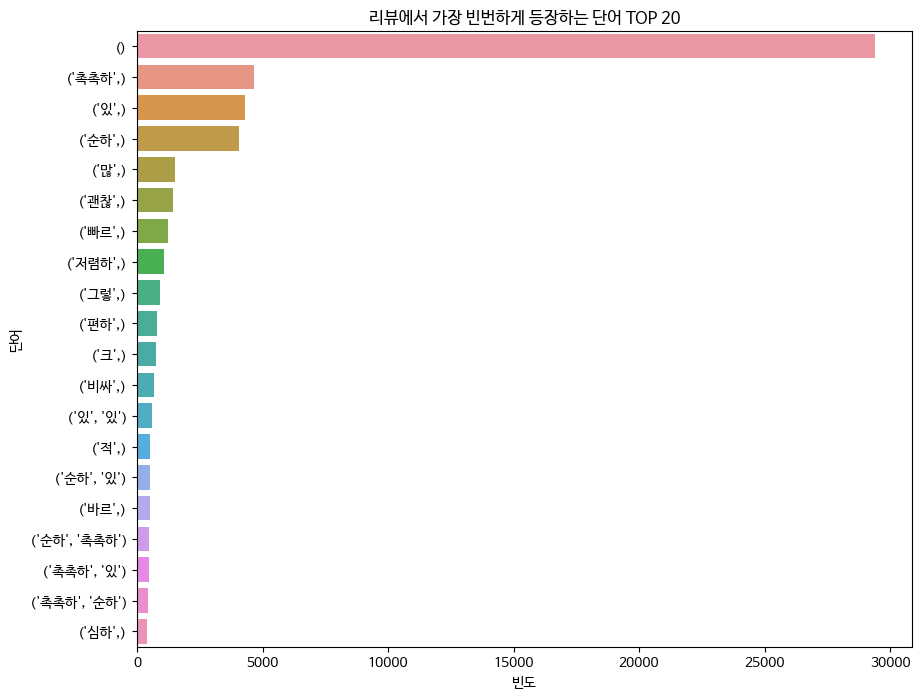

In [ ]:
from collections import Counter

# 가장 빈번하게 등장하는 단어 확인
word_counts = Counter(tuple_arr)
common_words = word_counts.most_common(20)

common_words_df = pd.DataFrame(common_words, columns=['단어', '빈도'])

plt.figure(figsize=(10, 8))
sns.barplot(x='빈도', y='단어', data=common_words_df)
plt.title('리뷰에서 가장 빈번하게 등장하는 단어 TOP 20')
plt.show()

In [ ]:
train_kiwi_xr_words =[]

for idx,text in enumerate(train_text):
    result = kiwi.tokenize(text,stopwords=stopwords)
    tmp = [token.form for token in result if token.tag in ['V']] # 용언
    train_kiwi_xr_words.append(tmp)

In [ ]:
train_kiwi_va_words

[['있'],
 [],
 ['있'],
 ['똑같'],
 ['넓', '촉촉하', '촉촉하', '있', '있'],
 [],
 ['넉넉하', '그렇'],
 ['있'],
 ['순하', '그렇', '있'],
 ['괜찮', '잘나'],
 ['빠르'],
 ['그렇'],
 [],
 [],
 ['저렴하', '빠르'],
 [],
 ['착하'],
 [],
 ['묽'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['빠르', '순하'],
 [],
 [],
 [],
 ['순하'],
 [],
 ['순하', '그렇'],
 ['괜찮'],
 ['많', '저렴하', '저렴하', '심하'],
 [],
 [],
 ['순하', '많', '그'],
 ['빠르'],
 ['저렴하', '괜찮', '넓'],
 ['저렴하', '괜찮', '그렇', '익숙하', '괜찮'],
 [],
 ['저렴하'],
 [],
 ['빠르', '많', '어떻', '궁금하'],
 [],
 ['괜찮', '그렇'],
 ['촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하',
  '촉촉하'],
 ['크', '많', '많', '많', '저렴하'],
 [],
 ['많', '크', '순하'],
 [],
 [],
 ['괜찮'],
 ['빠르', '싸'],
 [],
 ['괜찮'],
 [],
 ['괜찮', '저렴하', '쎄', '있'],
 ['편하', '적', '풍부하', '많', '있'],
 [],
 ['있'],
 [],
 [],
 ['강하'],
 ['그렇', '순하'],
 ['촉촉하', '괜찮', '순하'],
 ['독하'],
 ['착하'],
 ['무난하', '높'],
 ['적'],
 ['저렴하'],
 [],
 ['순하'

In [ ]:
tuple_arr1 = [tuple(i) for i in train_kiwi_va_words]

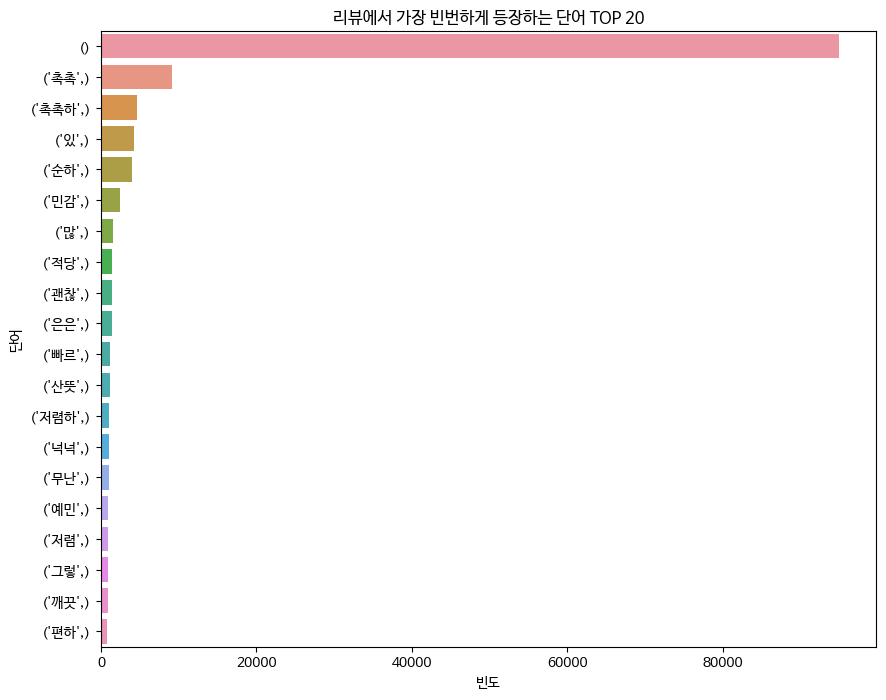

In [ ]:
from collections import Counter

# 가장 빈번하게 등장하는 단어 확인
word_counts = Counter(tuple_arr1)
common_words = word_counts.most_common(20)

common_words_df = pd.DataFrame(common_words, columns=['단어', '빈도'])

plt.figure(figsize=(10, 8))
sns.barplot(x='빈도', y='단어', data=common_words_df)
plt.title('리뷰에서 가장 빈번하게 등장하는 단어 TOP 20')
plt.show()

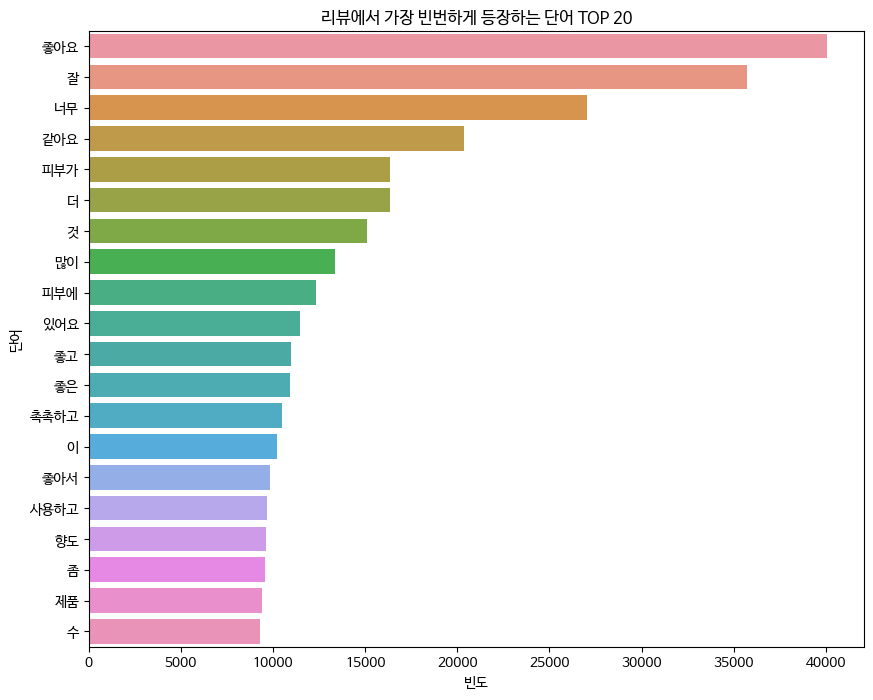

In [ ]:
from collections import Counter
import re

# 리뷰 텍스트에서 한글만 추출
reviews = ' '.join(df['리뷰'])
korean_words = re.findall(r'[\uac00-\ud7a3]+', reviews)

# 가장 빈번하게 등장하는 단어 확인
word_counts = Counter(korean_words)
common_words = word_counts.most_common(20)

common_words_df = pd.DataFrame(common_words, columns=['단어', '빈도'])

plt.figure(figsize=(10, 8))
sns.barplot(x='빈도', y='단어', data=common_words_df)
plt.title('리뷰에서 가장 빈번하게 등장하는 단어 TOP 20')
plt.show()


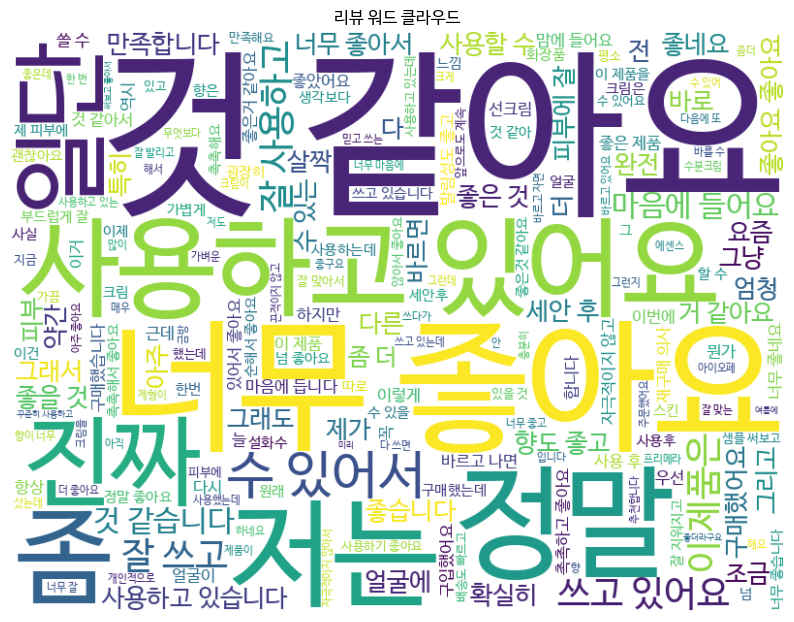

In [ ]:
from wordcloud import WordCloud

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      background_color='white',
                      width=800,
                      height=600).generate(' '.join(korean_words))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('리뷰 워드 클라우드')
plt.show()


# boxplot

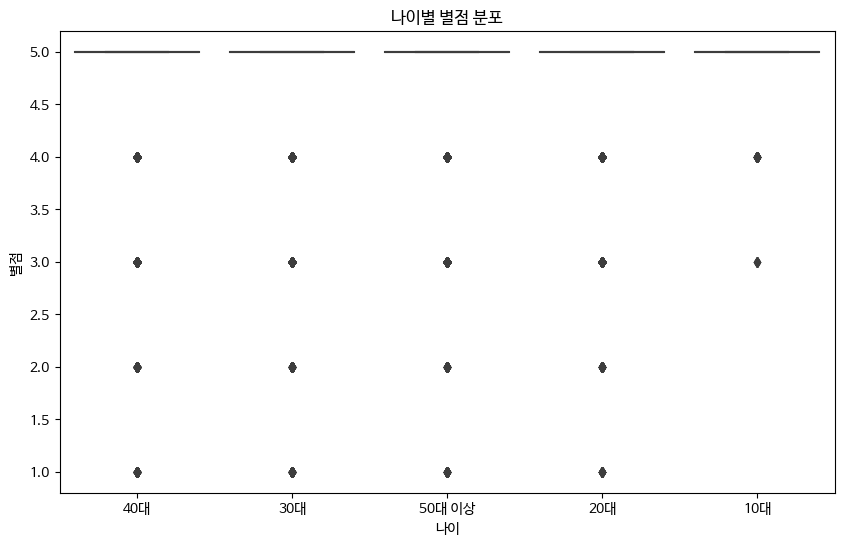

In [ ]:
# 나이와 별점 간의 관계 확인
plt.figure(figsize=(10, 6))
sns.boxplot(x='나이', y='별점', data=df, order=df['나이'].value_counts().index)
plt.title('나이별 별점 분포')
plt.show()


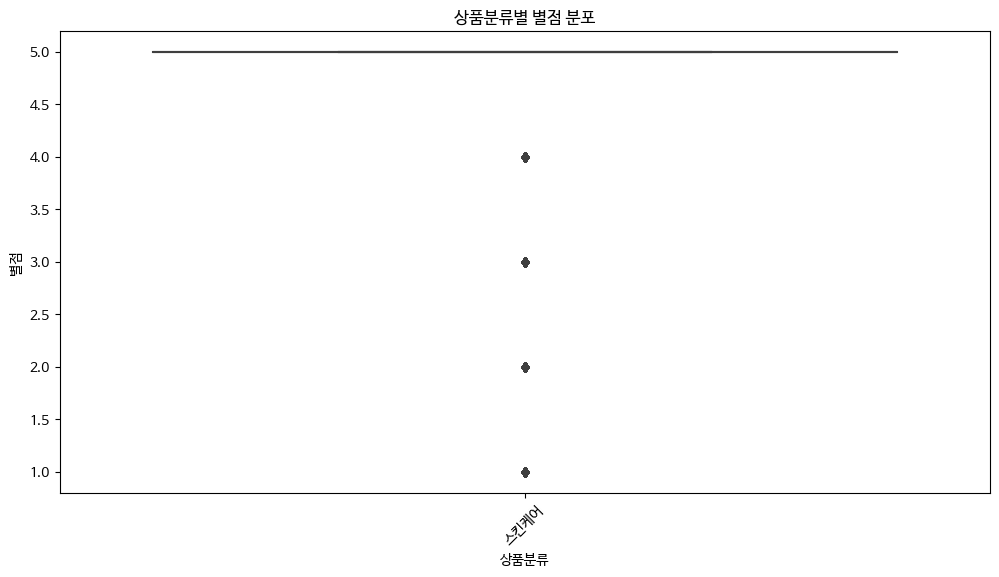

In [ ]:
# 상품분류별 별점 분포 확인
plt.figure(figsize=(12, 6))
sns.boxplot(x='상품분류', y='별점', data=df, order=df['상품분류'].value_counts().index)
plt.title('상품분류별 별점 분포')
plt.xticks(rotation=45)
plt.show()


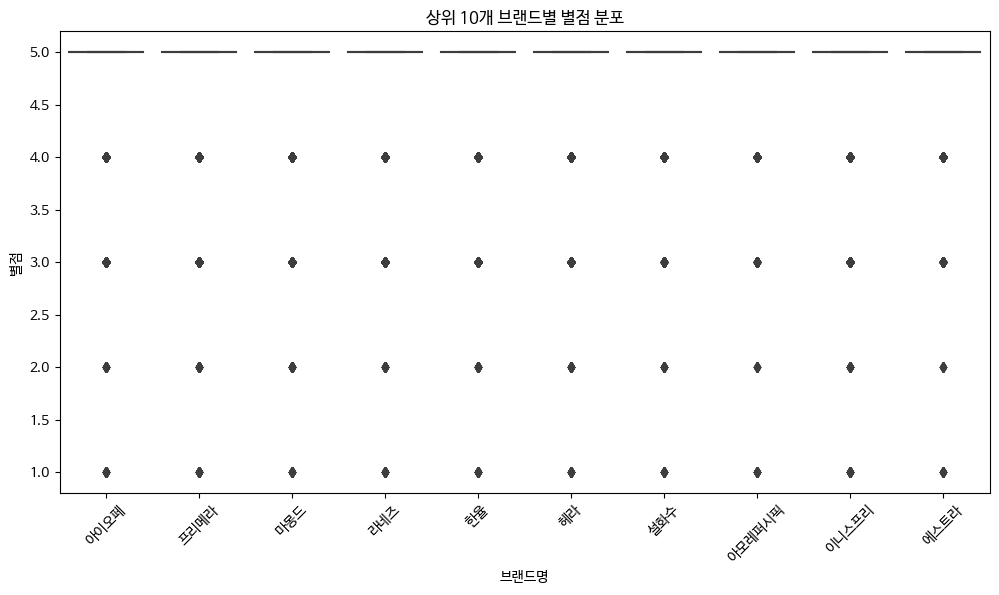

In [ ]:
# 리뷰 수가 많은 상위 10개 브랜드 선택
top_brands = df['브랜드명'].value_counts().head(10).index

# 상위 10개 브랜드만 포함된 데이터프레임 생성
top_brands_df = df[df['브랜드명'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='브랜드명', y='별점', data=top_brands_df, order=top_brands)
plt.title('상위 10개 브랜드별 별점 분포')
plt.xticks(rotation=45)
plt.show()


# 군집분석(헤비유저 라이트유저 구분)

In [ ]:
# '나이', '성별', '피부타입', '피부트러블'을 조합하여 가상유저 생성
df['가상유저'] = df['나이'] + ',' + df['성별'] + ',' + df['피부타입'] + ',' + df['피부트러블']

# '브랜드명', '상품명', '가상유저'만 포함하는 데이터프레임 생성
virtual_user_df = df[['브랜드명', '상품명', '가상유저']].drop_duplicates().reset_index(drop=True)

virtual_user_df

In [ ]:
# 가상유저와 상품명을 기준으로 구매횟수 계산
virtual_user_purchase_counts = virtual_user_df1.groupby(['가상유저', '상품명']).size().reset_index(name='구매횟수')

virtual_user_purchase_counts

In [ ]:
virtual_user_purchase_counts['구매횟수'].value_counts()

In [ ]:
# 가상유저와 상품명을 숫자 ID로 변환
user_to_id = {user: i for i, user in enumerate(virtual_user_purchase_counts['가상유저'].unique())}
product_to_id = {product: j for j, product in enumerate(virtual_user_purchase_counts['상품명'].unique())}

virtual_user_purchase_counts['user_id'] = virtual_user_purchase_counts['가상유저'].map(user_to_id)
virtual_user_purchase_counts['product_id'] = virtual_user_purchase_counts['상품명'].map(product_to_id)

# 숫자 ID와 구매 횟수로 구성된 데이터프레임 생성
formatted_data = virtual_user_purchase_counts[['user_id', 'product_id', '구매횟수']]

formatted_data

In [ ]:
formatted_data.info()

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [ ]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(formatted_data)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit(formatted_data)
formatted_data['cluster'] = clusters.labels_
formatted_data.head()

In [ ]:
formatted_data.groupby('cluster').count()

## 구매횟수, 리뷰수 추가하여 군집분석